In [349]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## Load libraries

In [380]:
# Load libraries
# import numpy, pandas, scipy, math, matplotlib
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from math import sqrt
from pandas.plotting import scatter_matrix

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# training and cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score



### Load the dataset

In [351]:
# Load dataset
rawData = pd.read_csv('default of credit card clients_revised.csv', header =1)
rawData

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Shows the location of the file

In [285]:
pwd

'C:\\Users\\nsrid\\OneDrive\\Documents\\UT Datascience certification\\My_Jupyter_notebooks'

In [286]:
# Identify the type of variables in the rawdataset
rawData.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [287]:
rawData.head

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BI

In [291]:
# First convert to float type for variables that will be converted to category
to_convert = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']
rawData[to_convert] = rawData[to_convert].astype('float64')

In [293]:
rawData.dtypes

LIMIT_BAL                       int64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_1                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                       int64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month    float64
dtype: object

In [294]:
# Class distribution: Check the balance of classification between default and non default
rawData.groupby('default payment next month')['default payment next month'].count()

default payment next month
0.0    23364
1.0     6636
Name: default payment next month, dtype: int64

In [295]:
corrMat = rawData.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_1                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

### Convert dependent variable to categorical type - since this is classification problem.

In [296]:
# Converting dependent variable to categorical
rawData['default payment next month'] = rawData['default payment next month'].astype('category')

##### Create a backup rawdata in case

In [299]:
# As a backup, you can create a copy of the original dataframe
rawData_bkup = rawData

In [300]:
rawData_bkup.dtypes

LIMIT_BAL                        int64
SEX                              int64
EDUCATION                        int64
MARRIAGE                         int64
AGE                              int64
PAY_1                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default payment next month    category
dtype: object

## Feature engineering
#### Creating variable names for certain columns, rows, range of columns and rows in the dataframe

In [301]:
# Converting SEX, EDUCATion, MARRIAGE, AGE to category type
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['AGE'] = rawData['AGE'].astype('category')

# converting a set of columns in 1 statement to category type
to_convert = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
rawData[to_convert] = rawData[to_convert].astype('category')

# converting a set of columns in 1 statement to float64 type
to_convert = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
rawData[to_convert] = rawData[to_convert].astype('float64')

to_convert = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
rawData[to_convert] = rawData[to_convert].astype('float64')

In [302]:
rawData.dtypes

LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                           category
PAY_1                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default payment next month    category
dtype: object

In [303]:
#  Gather some information about different column in your DataFrame after variable type conversion
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
PAY_1                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000

### Check for null values

In [304]:
# To checking for null values by checking the total sum of all null values
print(rawData.isnull().values.sum())


0


In [305]:
# other option is to check the column-wise distribution of null values
print(rawData.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


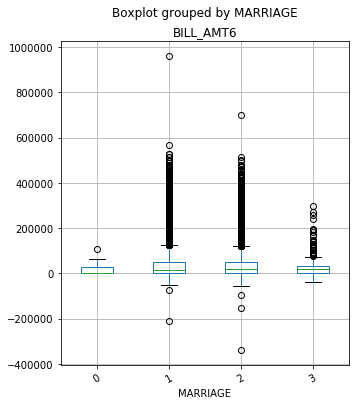

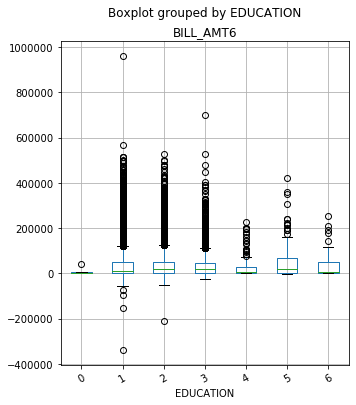

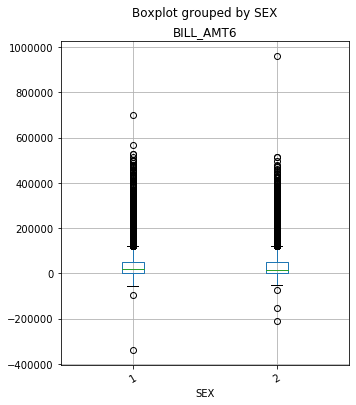

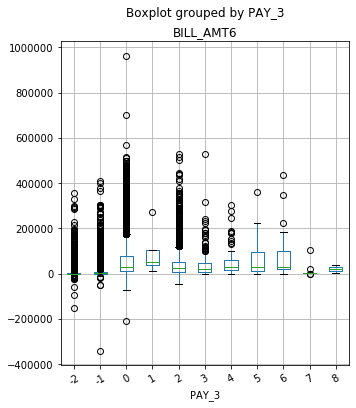

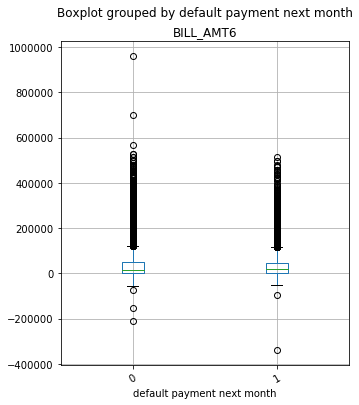

In [355]:
# To understand more on the categorical variables, use the box plot method to verify that they are indeed categorical
rawData.boxplot('BILL_AMT6','MARRIAGE',rot = 30,figsize=(5,6))
rawData.boxplot('BILL_AMT6','EDUCATION',rot = 30,figsize=(5,6))
rawData.boxplot('BILL_AMT6','SEX',rot = 30,figsize=(5,6))
rawData.boxplot('BILL_AMT6','PAY_3',rot = 30,figsize=(5,6))
rawData.boxplot('BILL_AMT6','default payment next month',rot = 30,figsize=(5,6))

In [356]:
# To create a dataframe comprising of just categorical variables, use the copy method
rawData_categ = rawData.select_dtypes(include=['category']).copy()

In [357]:
rawData_categ.head(10)

""
0
1
2
3
4
5
6
7
8
9


### Creating the feature set

In [358]:
#features
features = rawData.iloc[:,0:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Cleaned up dataset for model evaluation and classification

In [359]:
# axis=1 means the column axis
Cleanedup_feature = features
Cleanedup_feature
# This is the new cleaned up dataset

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Establish training and testing data set
##### Measuring Success: Splitting up the data for train and test set
##### Split the dataset up into the following segments:
#####  Training Data: 70%
##### Test Data: 30%

In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split

#### Split into train and test set

In [361]:
print(len(Cleanedup_feature))

30000


In [384]:
# Creating a sub-set for training-testing
Cleaned_subset = (Cleanedup_feature[:20000])
print(len(Cleaned_subset))

20000


#### Splitting the cleaned up data into 70% training and 30% testing

In [385]:
features = Cleaned_subset.iloc[:,0:23]
print('Summary of feature sample')
# features is the dataframe with independent variables after feature engineering
labels = Cleaned_subset['default payment next month']
# OR THIS CAN ALSO stated as labels = Cleaned_subset.iloc[:,23:24]
print(labels.head())
# labels is the dataframe for the dependent variable

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

Summary of feature sample
0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64


In [386]:
features.head()
labels.head()
X_train
y_train

17218    0
15188    0
11295    1
19772    0
13072    1
        ..
11284    1
11964    1
5390     1
860      0
15795    1
Name: default payment next month, Length: 14000, dtype: int64

In [387]:
print(len(features), len(labels), len(X_train), len(X_test), len(y_train), len(y_test))

20000 20000 14000 6000 14000 6000


In [388]:
for dataset in [y_train, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.7
0.3


#### Evaluating 6 different models for classification

In [389]:
#Models

modelKNN = KNeighborsClassifier(n_neighbors =3,n_jobs = -1)
modelRF = RandomForestRegressor()
modelLR = LogisticRegression()
modelLDA = LinearDiscriminantAnalysis()
modelCART = DecisionTreeClassifier()
modelSVC = SVC()


#### Doing cross validation using one classification algorithm

In [390]:
# cross validation results using the training set 
# This is for KNN model as an example
scores = cross_val_score(modelKNN, X_train, y_train, cv=10, scoring = 'accuracy')
scores
# What you are seeing below in the output is the individual k-fold score.

array([0.72571429, 0.74142857, 0.73071429, 0.71428571, 0.73571429,
       0.71928571, 0.73      , 0.74428571, 0.72928571, 0.71      ])

#### Doing evaluation for the same training set for six models typically used for classification problems

In [369]:

modelRF.fit(X_train,y_train)
modelKNN.fit(X_train,y_train)
modelLR.fit(X_train,y_train)
modelLDA.fit(X_train,y_train)
modelCART.fit(X_train,y_train)
modelSVC.fit(X_train,y_train)

scoresRF = cross_val_score(modelRF, X_train, y_train, cv=10)
scoresKNN = cross_val_score(modelKNN, X_train, y_train, cv=10, scoring = 'accuracy')
scoresLR = cross_val_score(modelLR, X_train, y_train, cv=10)
scoresLDA = cross_val_score(modelLDA, X_train, y_train, cv=10)
scoresCART = cross_val_score(modelCART, X_train, y_train, cv=10)
scoresSVC = cross_val_score(modelSVC, X_train, y_train, cv=10)
                            
print('RF Regressor: {}'.format(scoresRF))
print('KNN: {}'.format(scoresKNN))
print('LDA: {}'.format(scoresLR))
print('Logistic Regression: {}'.format(scoresLDA))
print('CART : {}'.format(scoresCART))
print('SVC: {}'.format(scoresSVC))

#print(cross_val_score(modelRF, X_train, y_train, cv=10)) 
#print(cross_val_score(modelKNN, X_train, y_train, cv=10)) 
#print(cross_val_score(modelLR, X_train, y_train, cv=10)) 

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

RF Regressor: [ 0.11218064  0.22057691  0.14857361  0.11537398  0.14548462  0.12796655
  0.03499465  0.02150726  0.129166   -0.01595157]
KNN: [0.72857143 0.72       0.73714286 0.74571429 0.75142857 0.71142857
 0.73428571 0.7        0.70857143 0.72571429]
LDA: [0.77428571 0.77428571 0.77428571 0.77428571 0.77428571 0.77428571
 0.77428571 0.77142857 0.77142857 0.76857143]
Logistic Regression: [0.80857143 0.80285714 0.79714286 0.80857143 0.79142857 0.78571429
 0.79142857 0.77142857 0.79714286 0.76571429]
CART : [0.70571429 0.72285714 0.68285714 0.69142857 0.74857143 0.70285714
 0.68285714 0.73714286 0.69428571 0.7       ]
SVC: [0.77428571 0.77428571 0.77428571 0.77428571 0.77428571 0.77428571
 0.77428571 0.77142857 0.77142857 0.77142857]


#### The other option is to Spot-Check Algorithms by measuring the accuracy and std dev across all the folds for each model

In [370]:
models = []
models.append(('RF', modelRF))
models.append(('KNN', modelKNN))
models.append(('LR', modelLR))
models.append(('LDA', modelLDA))
models.append(('CART', modelCART))
models.append(('SVC', modelSVC))
# evaluate each model in turn

In [371]:
# Evaluate each model in turn to get the mean and std dev for each algorithm
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.105243 (0.068831)
KNN: 0.726286 (0.015691)


c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

LR: 0.773143 (0.001895)
LDA: 0.792000 (0.013690)
CART: 0.702857 (0.026894)
SVC: 0.773429 (0.001309)


#### Compare algorithm to pick the best one

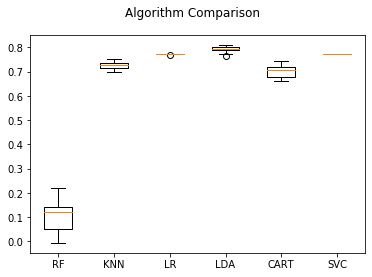

In [394]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Based on the results, Linear Discriminant Analysis model (LDA) is the best.
#### LDA has a closed-form solution and therefore does not need hyperparameters tuning.
##### Hence there is no gridSearch

### Now let us predict the LDA model on unseen data which is the 'test' data which is the remaining test datapoints in the training testing dataset.
#### Here we will use additional metrics such as precision and recall
#### Metrics used here on unseen data are: Accuracy score, precision and recall

In [409]:
# Make predictions on test dataset using the best model for this dataset - LDA
modelLDA = LinearDiscriminantAnalysis()
modelLDA.fit(X_train,y_train.values.ravel())
y_pred = modelLDA.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred.round()), 3)
Confusion_matrix = (confusion_matrix(y_test, y_pred.round()), 3)
Classification_report = (classification_report(y_test, y_pred.round()), 3)
print('Accuracy: {}'.format(accuracy))
print('Confusion matrix: {}'.format(Confusion_matrix))
print('Classification report: {}'.format(Classification_report))

Accuracy: 0.806
Confusion matrix: (array([[4499,  159],
       [1006,  336]], dtype=int64), 3)
Classification report: ('              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      4658\n           1       0.68      0.25      0.37      1342\n\n    accuracy                           0.81      6000\n   macro avg       0.75      0.61      0.63      6000\nweighted avg       0.79      0.81      0.77      6000\n', 3)


### Now we will predict on the remaining unseen data that was not included in the training and test data

In [414]:
# this is the complete dataframe without the first 1000 rows that was used for training and testing. 
# This is the rest of the unseen data that is also called validation data
Unseen_data = rawData.iloc[-10000:]
Unseen_data
print(len(Unseen_data))
valid_features = Unseen_data.iloc[:,0:23]
# features is the dataframe with independent variables after feature engineering
valid_depvar = Unseen_data['default payment next month']
print(len(valid_depvar))
# labels is the dataframe for the dependent variable

10000
10000


In [415]:
y_pred = modelLDA.predict(valid_features)
accuracy = round(accuracy_score(valid_depvar, y_pred.round()), 3)
precision = round(precision_score(valid_depvar, y_pred.round()), 3)
recall = round(recall_score(valid_depvar, y_pred.round()), 3)
print('Accuracy: {} / Precision: {} / Recall: {}'.format(accuracy, precision, recall))

Accuracy: 0.824 / Precision: 0.732 / Recall: 0.238
